In [895]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import system

In [896]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score , classification_report
from sklearn.svm import SVC

In [897]:
import warnings
warnings.filterwarnings('ignore')

In [898]:
names = ["Age","Workclass","Education","Marital_status","Occupation","Gender","Capital_gain","Capital_loss","Hours_per_Week","Country","Income"]
df = pd.read_csv("KiBord-OlympicChallenge2.csv" , names = names)
df1 = pd.read_csv("KiBord-OlympicChallenge2.csv" , names = names)
df["Workclass"] = df["Workclass"].replace(" ?" , "Uncertain")
df1["Workclass"] = df1["Workclass"].replace(" ?" , "Uncertain")

In [899]:
df = df.drop(index = 0)
df = df.reset_index(drop = True)
df1 = df1.drop(index = 0)
df1 = df1.reset_index(drop = True)

In [900]:
df.isna().sum()

Age               0
Workclass         0
Education         0
Marital_status    0
Occupation        0
Gender            0
Capital_gain      0
Capital_loss      0
Hours_per_Week    0
Country           0
Income            0
dtype: int64

In [901]:
df

,Age,Workclass,Education,Marital_status,Occupation,Gender,Capital_gain,Capital_loss,Hours_per_Week,Country,Income
0,39,Government,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married,Tech-support,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married,Machine-op-inspct,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Divorced,Adm-clerical,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


In [902]:
le = LabelEncoder()
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Gender = le.fit_transform(df.Gender)
df.Country = le.fit_transform(df.Country)
df.Income = le.fit_transform(df.Income)

In [903]:
df

,Age,Workclass,Education,Marital_status,Occupation,Gender,Capital_gain,Capital_loss,Hours_per_Week,Country,Income
0,39,5,9,2,1,1,2174,0,40,39,0
1,50,3,9,1,4,1,0,0,13,39,0
2,38,1,11,0,6,1,0,0,40,39,0
3,53,1,1,1,6,1,0,0,40,39,0
4,28,1,9,1,10,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,7,1,13,0,0,0,38,39,0
32557,40,1,11,1,7,1,0,0,40,39,1
32558,58,1,11,0,1,0,0,0,40,39,0
32559,22,1,11,2,1,1,0,0,20,39,0


In [904]:
x = df[["Age","Workclass","Education","Marital_status","Occupation","Gender","Capital_gain","Capital_loss","Hours_per_Week","Country"]]
y = df[["Income"]]

In [905]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .3 , random_state = 12)

In [906]:
print(x_train.shape)
print(y_train.shape)

(22792, 10)
(22792, 1)


In [907]:
model_gini = DecisionTreeClassifier(criterion = "gini" , random_state = 0)
model_gini.fit(x_train, y_train)
predicted = model_gini.predict(x_test)
ac = accuracy_score(y_test , predicted)
print("accuracy model(gini) = : {}%".format(ac * 100))

accuracy model(gini) = : 81.36963865288156%


In [908]:
model = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
ac = accuracy_score(y_test , predicted)
print("accuracy model(entropy) = : {}%".format(ac * 100))

accuracy model(entropy) = : 81.66649605896203%


entropy is beter :)

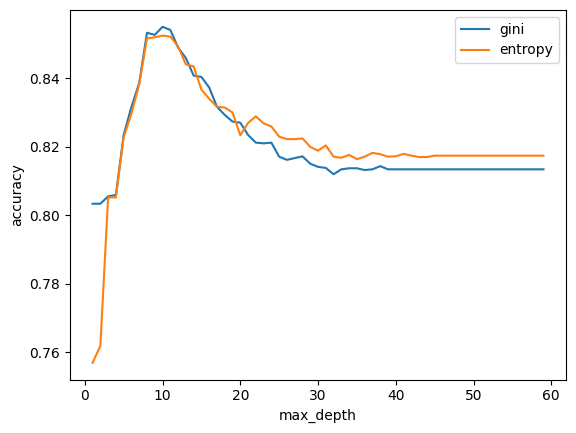

In [909]:
max_depth = list()
acc_gini = list()
acc_entropy = list()
for i in range(1 , 60):
    dtree = DecisionTreeClassifier(criterion = "gini" , max_depth = i , random_state = 12)
    dtree.fit(x_train , y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test , pred))

    dtree = DecisionTreeClassifier(criterion = "entropy" , max_depth = i , random_state = 12)
    dtree.fit(x_train , y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test , pred))
    max_depth.append(i)
d = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                  "acc_entropy" : pd.Series(acc_entropy),
                  "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth" , "acc_gini" , data = d , label = "gini")
plt.plot("max_depth" , "acc_entropy" , data = d , label = "entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [910]:
max_depth_final = acc_gini.index(max(acc_gini))
# print("best accyracy score{%d} , depth with {%f}.", (max_depth_final , max(acc_gini)))
print("best accuracy = {}".format(max(acc_gini) * 100))

best accuracy = 85.49493295117207


In [911]:
# tree.plot_tree(model)
# plt.show()

In [912]:
scal = MinMaxScaler()
bn = df[["Hours_per_Week"]]
dat = scal.fit_transform(df)

In [913]:
dat

array([[0.30136986, 0.83333333, 0.6       , ..., 0.04761905, 0.95121951,
        0.        ],
       [0.45205479, 0.5       , 0.6       , ..., 0.01465201, 0.95121951,
        0.        ],
       [0.28767123, 0.16666667, 0.73333333, ..., 0.04761905, 0.95121951,
        0.        ],
       ...,
       [0.56164384, 0.16666667, 0.73333333, ..., 0.04761905, 0.95121951,
        0.        ],
       [0.06849315, 0.16666667, 0.73333333, ..., 0.02319902, 0.95121951,
        0.        ],
       [0.47945205, 0.33333333, 0.73333333, ..., 0.04761905, 0.95121951,
        1.        ]])

In [914]:
s1 = list()
s2 = list()
s3 = list()
s4 = list()
s5 = list()
s6 = list()
s7 = list()
s8 = list()
s9 = list()
s10 = list()
s11 = list()

for i in dat: s1.append(i[0])
for i in dat: s2.append(i[1])
for i in dat: s3.append(i[2])
for i in dat: s4.append(i[3])
for i in dat: s5.append(i[4])
for i in dat: s6.append(i[5])
for i in dat: s7.append(i[6])
for i in dat: s8.append(i[7])
for i in dat: s9.append(i[8])
for i in dat: s10.append(i[9])
for i in dat: s11.append(i[10])

In [915]:
dfg = df[["Age","Workclass","Education","Marital_status","Occupation","Gender","Capital_gain","Capital_loss","Hours_per_Week","Country","Income"]]
dfg["Age"] = s1
dfg["Workclass"] = s2
dfg["Education"] = s3
dfg["Marital_status"] = s4
dfg["Occupation"] = s5
dfg["Gender"] = s6
dfg["Capital_gain"] = s7
dfg["Capital_loss"] = s8
dfg["Hours_per_Week"] = s9
dfg["Country"] = s10
dfg["Income"] = s11

In [916]:
x = dfg[["Age","Workclass","Education","Marital_status","Occupation","Gender","Capital_gain","Capital_loss","Hours_per_Week","Country"]]
y = dfg[["Income"]]

In [917]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .3 , random_state = 12)

In [918]:
model2 = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
model2.fit(x_train, y_train)
predicted = model2.predict(x_test)
ac = accuracy_score(y_test , predicted)
print("accuracy model2(entropy) = : {}%".format(ac * 100))

accuracy model2(entropy) = : 81.5743678984543%


Classifier by SVM

In [919]:
clf = SVC(kernel = "poly")
clf.fit(x,y)

SVC(kernel='poly')

In [920]:
x = df[["Age","Workclass","Education","Marital_status","Occupation","Gender","Capital_gain","Capital_loss","Hours_per_Week","Country"]]
y = df[["Income"]]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .3 , random_state = 12)
y_pred = clf.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      7395
           1       0.42      0.10      0.16      2374

    accuracy                           0.75      9769
   macro avg       0.60      0.53      0.50      9769
weighted avg       0.68      0.75      0.68      9769



In [921]:
workclass = list(set(list(df1["Workclass"])))
education = list(set(list(df1["Education"])))
marital_status = list(set(list(df1["Marital_status"])))
occupation = list(set(list(df1["Occupation"])))
gender = list(set(list(df1["Gender"])))
# capital_gain = list(set(list(df1["Capital_gain"])))
# capital_loss = list(set(list(df1["Capital_loss"])))
# hours_per_Week = list(set(list(df1["Hours_per_Week"])))
country = list(set(list(df1["Country"])))

workclass_l = le.fit_transform(workclass)
education_l = le.fit_transform(education)
marital_status_l = le.fit_transform(marital_status)
occupation_l = le.fit_transform(occupation)
gender_l = le.fit_transform(gender)
country_l = le.fit_transform(country)

In [922]:
df1

,Age,Workclass,Education,Marital_status,Occupation,Gender,Capital_gain,Capital_loss,Hours_per_Week,Country,Income
0,39,Government,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married,Tech-support,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married,Machine-op-inspct,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Divorced,Adm-clerical,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,0,0,20,United-States,<=50K


In [923]:
ender = list()
while True:
    ager = int(input("Age: "))
    if 120 >= ager >= 0:
        ender.append(ager)
        break
system("cls")
for i in range(len(workclass)): print(f"{i+1} : {workclass[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 7:
        ender.append(workclass_l[inp - 1])
        break
print("\n\n\n")
system("cls")

for i in range(len(education)): print(f"{i+1} : {education[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 16:
        ender.append(education_l[inp - 1])
        break
print("\n\n\n")
system("cls")

for i in range(len(marital_status)): print(f"{i+1} : {marital_status[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 3:
        ender.append(marital_status_l[inp - 1])
        break
print("\n\n\n")
system("cls")

for i in range(len(occupation)): print(f"{i+1} : {occupation[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 15:
        ender.append(occupation_l[inp - 1])
        break
print("\n\n\n")
system("cls")

for i in range(len(gender)): print(f"{i+1} : {gender[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 2:
        ender.append(gender_l[inp - 1])
        break
print("\n\n\n")
system("cls")

while True:
    ager = int(input("Capital_gain: "))
    if ager >= 0:
        ender.append(ager)
        break
print("\n\n\n")
system("cls")

while True:
    ager = int(input("Capital_loss: "))
    if ager >= 0:
        ender.append(ager)
        break
print("\n\n\n")
system("cls")

while True:
    ager = int(input("Hours_per_Week: "))
    if ager >= 0:
        ender.append(ager)
        break
for i in range(len(country)): print(f"{i+1} : {country[i]}")
while True:
    inp = int(input("Enter: "))
    if 1 <= inp <= 42:
        ender.append(country_l[inp - 1])
        break
print("\n\n\n")
system("cls")



1 :  Self-emp-not-inc
2 :  Never-worked
3 :  Private
4 : Government
5 :  Self-emp-inc
6 :  Without-pay
7 : Uncertain




1 :  Bachelors
2 :  Assoc-acdm
3 :  Doctorate
4 :  12th
5 :  9th
6 :  Masters
7 :  10th
8 :  HS-grad
9 :  Some-college
10 :  5th-6th
11 :  Preschool
12 :  Prof-school
13 :  1st-4th
14 :  Assoc-voc
15 :  7th-8th
16 :  11th




1 : Divorced
2 : Never-married
3 : Married




1 :  Adm-clerical
2 :  Other-service
3 :  Tech-support
4 :  Protective-serv
5 :  Craft-repair
6 :  Armed-Forces
7 :  Transport-moving
8 :  ?
9 :  Handlers-cleaners
10 :  Machine-op-inspct
11 :  Sales
12 :  Priv-house-serv
13 :  Prof-specialty
14 :  Farming-fishing
15 :  Exec-managerial




1 :  Female
2 :  Male












1 :  Outlying-US(Guam-USVI-etc)
2 :  Japan
3 :  United-States
4 :  Greece
5 :  Holand-Netherlands
6 :  China
7 :  England
8 :  Trinadad&Tobago
9 :  Nicaragua
10 :  Italy
11 :  Vietnam
12 :  France
13 :  Cuba
14 :  Cambodia
15 :  Haiti
16 :  Thailand
17 :  El-Salvador
18 :  Philipp

0

In [944]:
a1 = model.predict([ender])
a2 = model2.predict([ender])
a3 = clf.predict([ender])
bishtar = 0
kamtar = 0
if a1 == 0: kamtar += 1
else: bishtar += 1

if a2 == 0: kamtar += 1
else: bishtar += 1

if a3 == 0: kamtar += 1
else: bishtar += 1

if kamtar > bishtar: print("Your income is less than or equal to fifty thousand coins")
else: print("Your income is more than fifty thousand coins")

Your income is less than or equal to fifty thousand coins
